# K-Means Clustering with the Seeds Dataset

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

In [2]:
seeds = pd.read_csv("../datasets/seeds.csv")

## Exploritory Data Analysis

In [3]:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
seeds.dtypes

area               float64
perimeter          float64
compactness        float64
length             float64
width              float64
asymmetry_coeff    float64
groove_length      float64
species              int64
dtype: object

In [15]:
print('There are', seeds.isnull().sum().sum(), 'nulls in the dataset')

There are 0 nulls in the dataset


In [16]:
print('There are', seeds.species.nunique(), 'unique species in the dataset')

There are 3 unique species in the dataset


In [18]:
seeds.species.value_counts()

3    70
2    70
1    70
Name: species, dtype: int64

In [10]:
seeds.describe().T

,count,mean,std,min,25%,50%,75%,max
area,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
perimeter,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
compactness,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
length,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
width,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
asymmetry_coeff,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
groove_length,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500
species,210.0,2.000000,0.818448,1.0000,1.00000,2.00000,3.000000,3.0000


In [11]:
import seaborn as sns

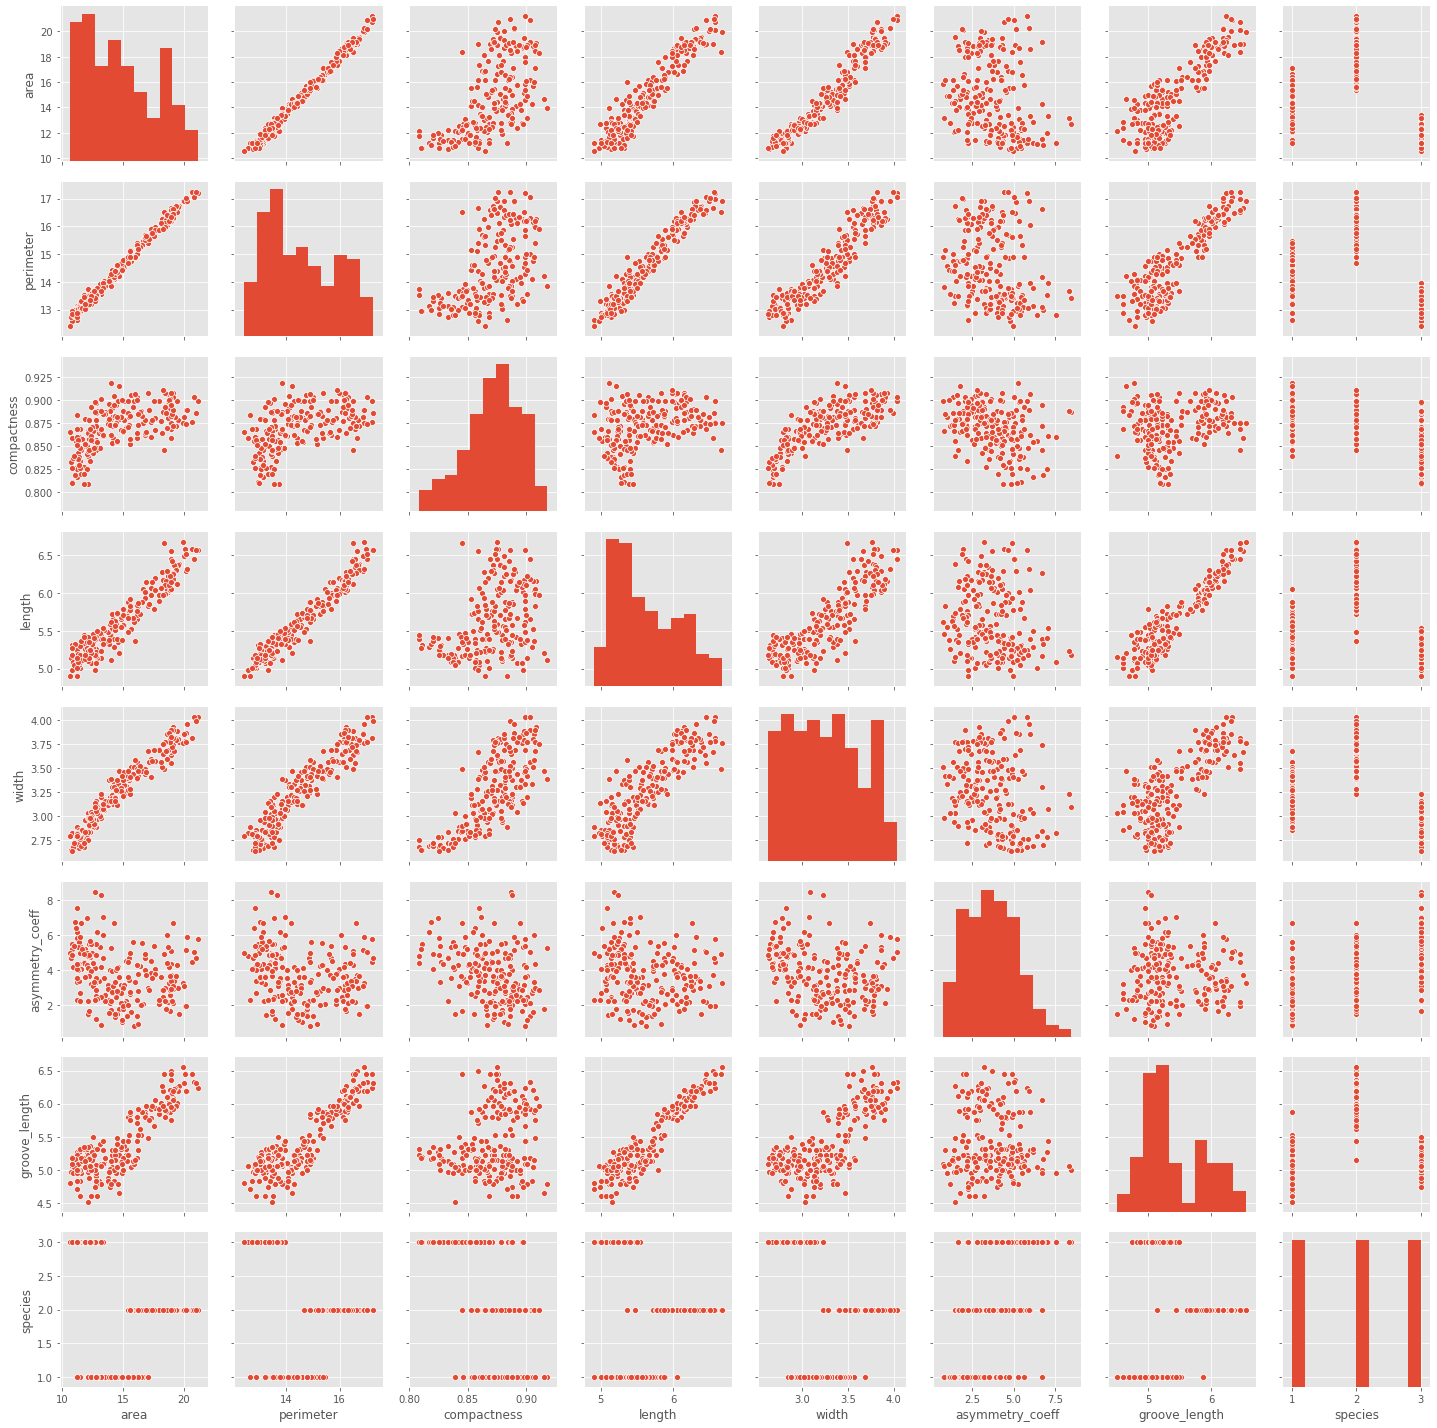

In [12]:
sns.pairplot(seeds)

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


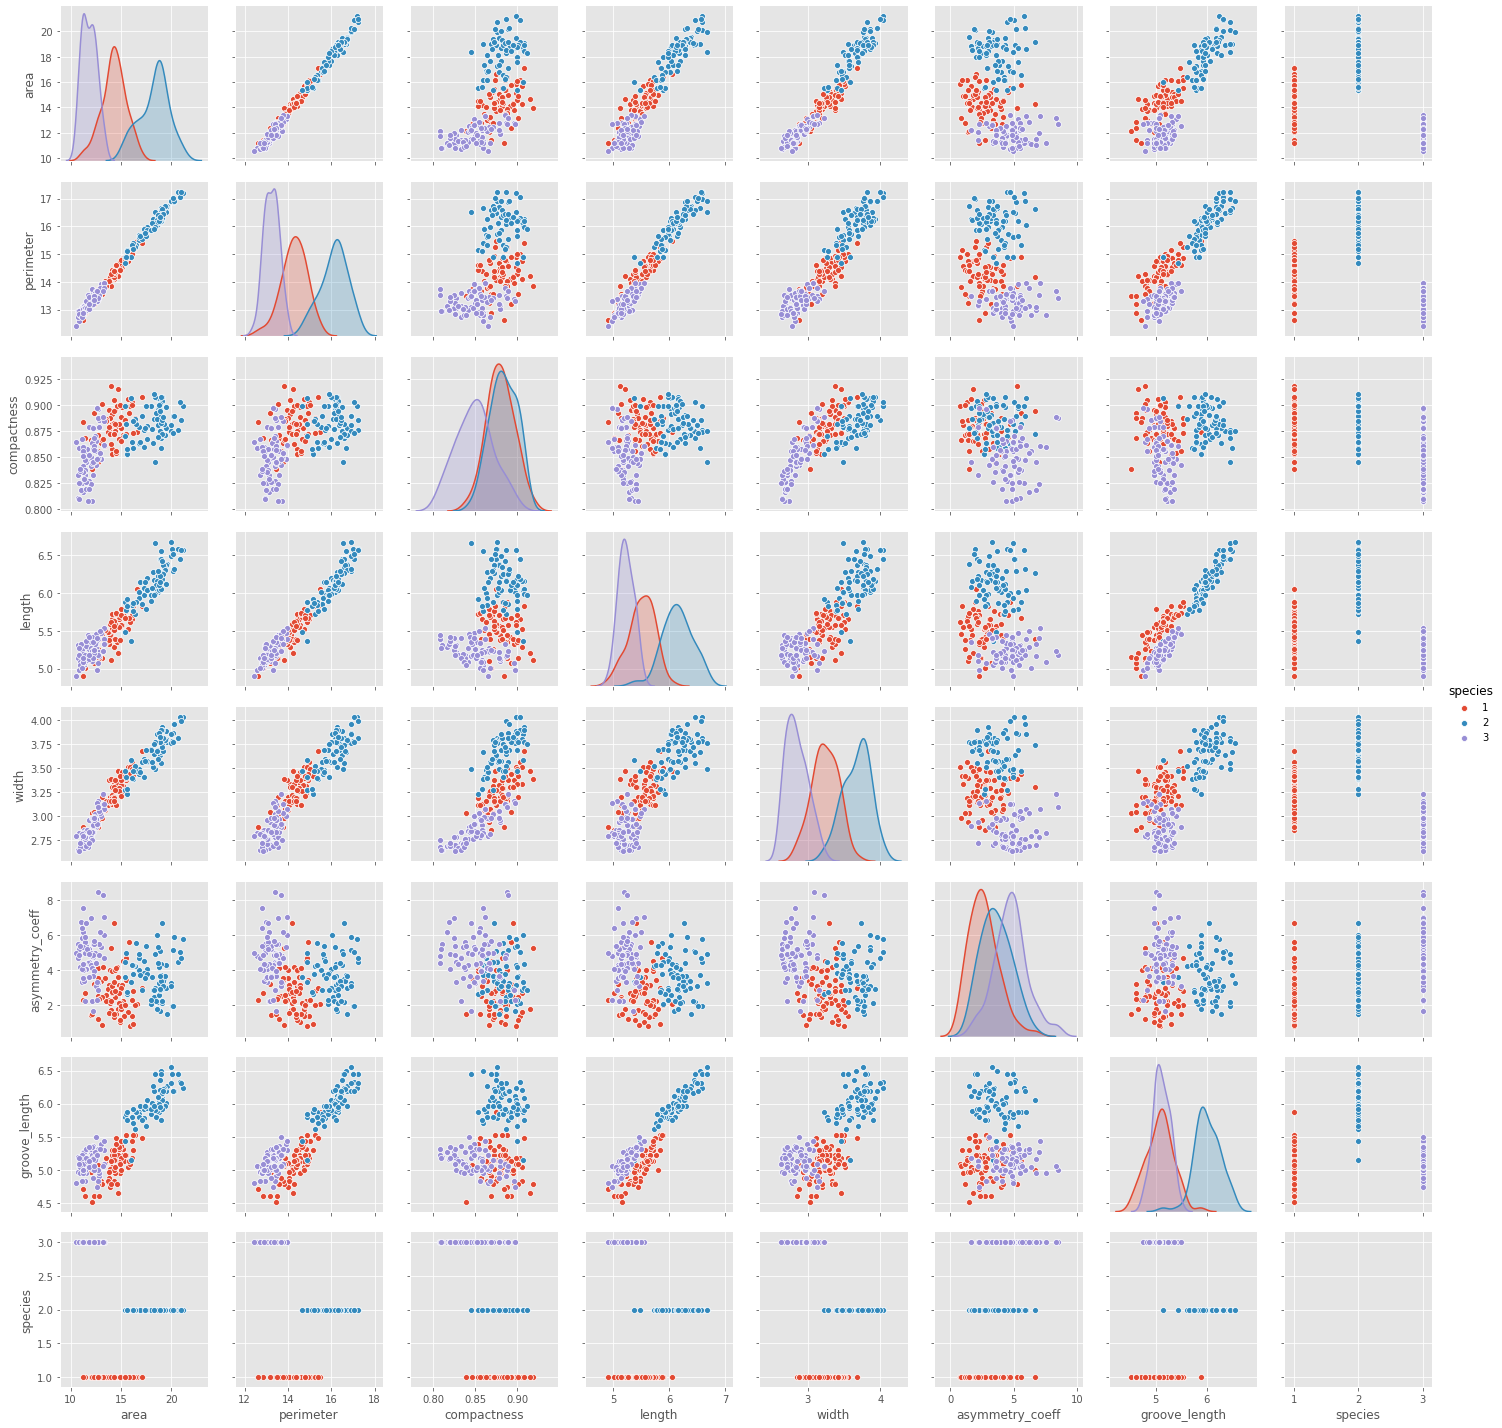

In [17]:
sns.pairplot(data=seeds, hue='species')

## Model Training

In [19]:
y = seeds.species
X = seeds.drop('species', axis=1)

In [22]:
from sklearn.preprocessing import normalize

Xn = normalize(X)

In [ ]:
from sklearn.cluster import KMeans

In [23]:
k_mean2 = KMeans(n_clusters=2)
k_mean2.fit(Xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
labels_2 = k_mean2.labels_
print(labels_2)

clusters_2 = k_mean2.cluster_centers_
print(clusters_2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1]
[[0.66929175 0.63185432 0.03700914 0.24244146 0.14335061 0.12355609
  0.2308226 ]
 [0.59452087 0.65538982 0.04178222 0.2581907  0.14176089 0.24787804
  0.25185439]]


In [25]:
k_mean3 = KMeans(n_clusters=3)
k_mean3.fit(Xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
labels_3 = k_mean3.labels_
print(labels_3)

clusters_3 = k_mean3.cluster_centers_
print(clusters_3)

[1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 2 1 1 2 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1
 1 0 2 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1
 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 2 2 2 2 2 2 1 2
 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 1 2 2 2 0 2 2 2 2]
[[0.66509806 0.62750951 0.03646614 0.24114117 0.1415701  0.16937951
  0.23066162]
 [0.67054001 0.63555118 0.03754245 0.24369327 0.14465753 0.09404806
  0.2312844 ]
 [0.5890222  0.65769788 0.04218078 0.25964956 0.14174127 0.25228245
  0.25373376]]


In [30]:
k_mean4 = KMeans(n_clusters=4)
k_mean4.fit(Xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
labels_4 = k_mean4.labels_
print(labels_4)

clusters_4 = k_mean4.cluster_centers_
print(clusters_4)

[0 0 0 0 0 0 3 0 0 0 3 0 1 0 0 3 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 3 1 0 0 0 0
 0 0 2 0 0 0 3 0 0 0 0 0 0 3 3 1 3 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 3 3 3 0
 3 3 3 3 3 0 3 3 3 0 0 0 0 3 3 3 0 0 0 3 3 3 3 0 0 0 3 0 3 0 3 0 0 3 0 0 0
 3 0 3 3 0 3 0 3 0 3 3 3 0 3 3 3 0 0 3 0 0 3 3 3 3 3 0 0 3 2 2 2 2 1 2 1 1
 1 2 2 2 1 1 1 2 1 1 1 2 1 1 2 1 2 0 1 1 1 1 2 2 1 2 2 2 2 2 2 0 2 2 1 2 2
 1 2 1 2 2 2 1 1 2 1 1 2 1 1 1 2 0 1 2 1 1 1 2 1 2]
[[0.67016257 0.635964   0.03761247 0.24398264 0.14481416 0.09544018
  0.23058879]
 [0.60547838 0.66395607 0.04242713 0.26070143 0.14405378 0.19312587
  0.25116559]
 [0.58196979 0.65192112 0.04184873 0.25806628 0.14055584 0.28644816
  0.25273862]
 [0.68070281 0.61491911 0.03443038 0.23459253 0.13987753 0.17148319
  0.22727955]]


In [32]:
k_mean6 = KMeans(n_clusters=6)
k_mean6.fit(Xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
labels_6 = k_mean6.labels_
print(labels_6)

clusters_6 = k_mean6.cluster_centers_
print(clusters_6)

[3 3 3 3 3 3 2 3 3 3 4 3 2 2 2 4 4 3 3 2 2 3 3 3 3 3 2 2 3 2 3 4 2 3 3 3 3
 0 2 5 3 3 3 4 3 3 3 3 3 3 2 4 2 2 3 3 3 3 3 3 2 2 2 2 3 3 3 3 3 2 4 4 4 0
 4 4 4 4 4 0 4 4 4 0 0 0 0 0 4 4 0 0 0 4 4 4 0 0 0 0 4 0 4 0 0 0 0 4 0 0 0
 0 0 4 4 0 4 0 0 0 4 0 4 0 4 4 4 0 0 4 0 0 4 4 4 4 0 3 3 4 1 5 1 1 1 5 2 1
 2 1 1 5 1 2 1 5 2 1 1 1 2 1 1 1 5 2 1 2 1 2 5 5 1 1 1 1 1 1 5 3 1 1 1 1 5
 1 1 1 5 1 1 1 2 1 1 1 1 1 2 2 1 3 1 5 2 2 1 5 2 1]
[[0.70139722 0.60893743 0.03313553 0.2321159  0.13934203 0.1029093
  0.22709517]
 [0.58888603 0.66148683 0.04237203 0.26157028 0.14158817 0.24230847
  0.25618595]
 [0.62059464 0.66162635 0.0419592  0.258734   0.14545388 0.16130164
  0.24483006]
 [0.65444572 0.64990915 0.03987779 0.24983232 0.14786752 0.09059472
  0.23210594]
 [0.67937165 0.61424367 0.03455238 0.23375611 0.14021593 0.18084468
  0.22660372]
 [0.57884274 0.64010238 0.04091162 0.25322689 0.13919757 0.32754603
  0.24652699]]


## Model Evaluation

In [34]:
from sklearn.metrics import silhouette_score

In [36]:
print('Silhouette score with 2 clusters:', silhouette_score(Xn, labels_2))
print('Silhouette score with 3 clusters:', silhouette_score(Xn, labels_3))
print('Silhouette score with 4 clusters:', silhouette_score(Xn, labels_4))
print('Silhouette score with 6 clusters:', silhouette_score(Xn, labels_6))

Silhouette score with 2 clusters: 0.5014485204560789
Silhouette score with 3 clusters: 0.36029385561045923
Silhouette score with 4 clusters: 0.35256056994809165
Silhouette score with 6 clusters: 0.36214224384510557


Text(0.5, 1, 'Predicted Cluster')

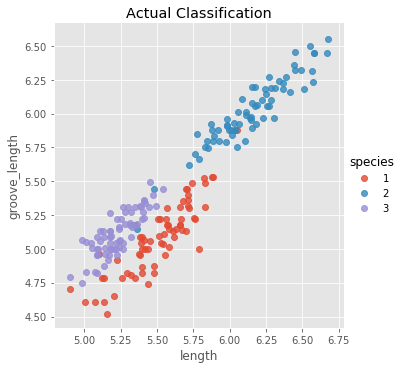

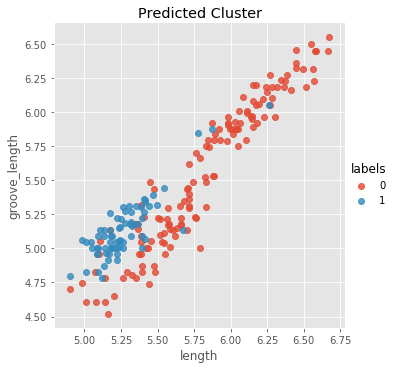

In [37]:
seeds2 = seeds
seeds2['labels'] = labels_2

sns.lmplot(x='length', y='groove_length', data=seeds2, hue='species', 
           fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='length', y='groove_length', data=seeds2, hue='labels',
           fit_reg=False)
plt.title('Predicted Cluster')

Text(0.5, 1, 'Predicted Cluster')

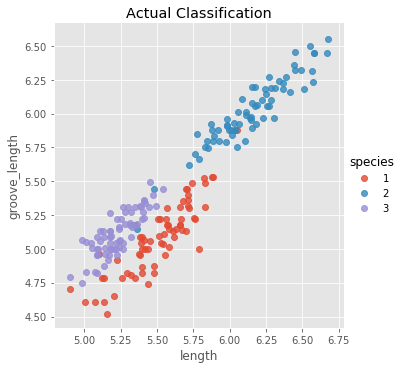

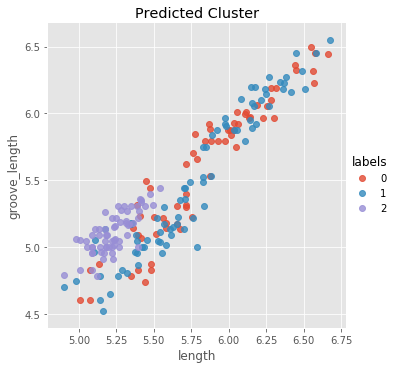

In [41]:
seeds3 = seeds
seeds3['labels'] = labels_3

sns.lmplot(x='length', y='groove_length', data=seeds3, hue='species',fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='length', y='groove_length', data=seeds3, hue='labels',fit_reg=False)
plt.title('Predicted Cluster')

Text(0.5, 1, 'Predicted Cluster')

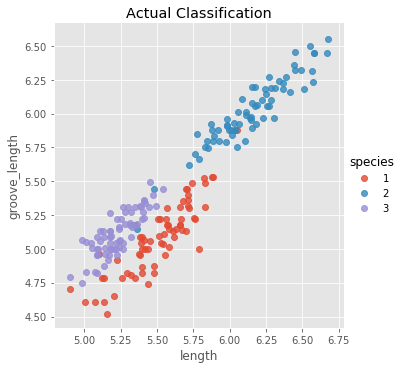

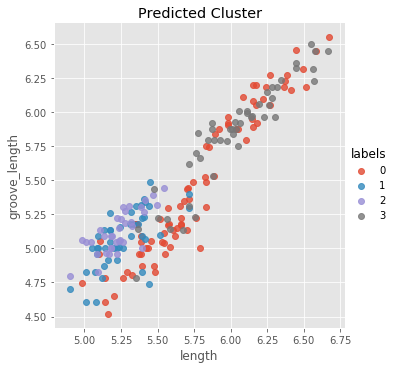

In [38]:
seeds4 = seeds
seeds4['labels'] = labels_4

sns.lmplot(x='length', y='groove_length', data=seeds4, hue='species',fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='length', y='groove_length', data=seeds4, hue='labels',fit_reg=False)
plt.title('Predicted Cluster')

Text(0.5, 1, 'Predicted Cluster')

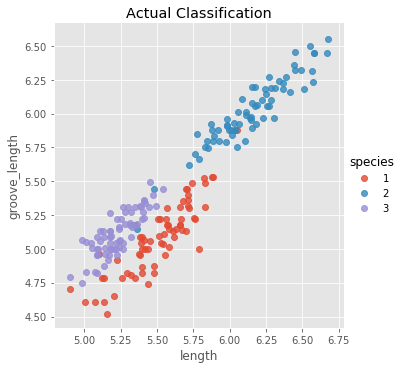

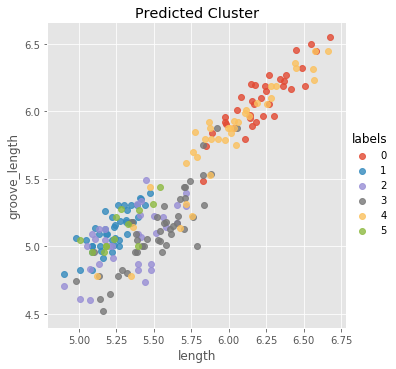

In [39]:
seeds6 = seeds
seeds6['labels'] = labels_6

sns.lmplot(x='length', y='groove_length', data=seeds6, hue='species',fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='length', y='groove_length', data=seeds6, hue='labels',fit_reg=False)
plt.title('Predicted Cluster')